In [3]:
from roboflow import Roboflow
from ultralytics import YOLO
import torch
import os
import cv2
from matplotlib import pyplot as plt
from IPython.display import Image

In [4]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt
%pip install -q roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 15978, done.
remote: Counting objects: 100% (147/147), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 15978 (delta 89), reused 111 (delta 70), pack-reused 15831
Receiving objects: 100% (15978/15978), 14.60 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (10962/10962), done.
/usr/src/app/p.krylov/yolov5
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [5]:
rf = Roboflow(api_key="85wKAzFLpbIAkm9l7zbw", model_format="yolov5",notebook="ultralytics")
project = rf.workspace("codev").project("codev")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [6]:
!python train.py --weights yolov5s.pt --cfg "models/yolov5s.yaml" --data /datasets/Codev-3/data.yaml --epochs 200 --batch-size 8 --hyp "data/hyps/hyp.scratch-high.yaml"

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=/datasets/Codev-3/data.yaml, hyp=data/hyps/hyp.scratch-high.yaml, epochs=200, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-178-ga199480 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl

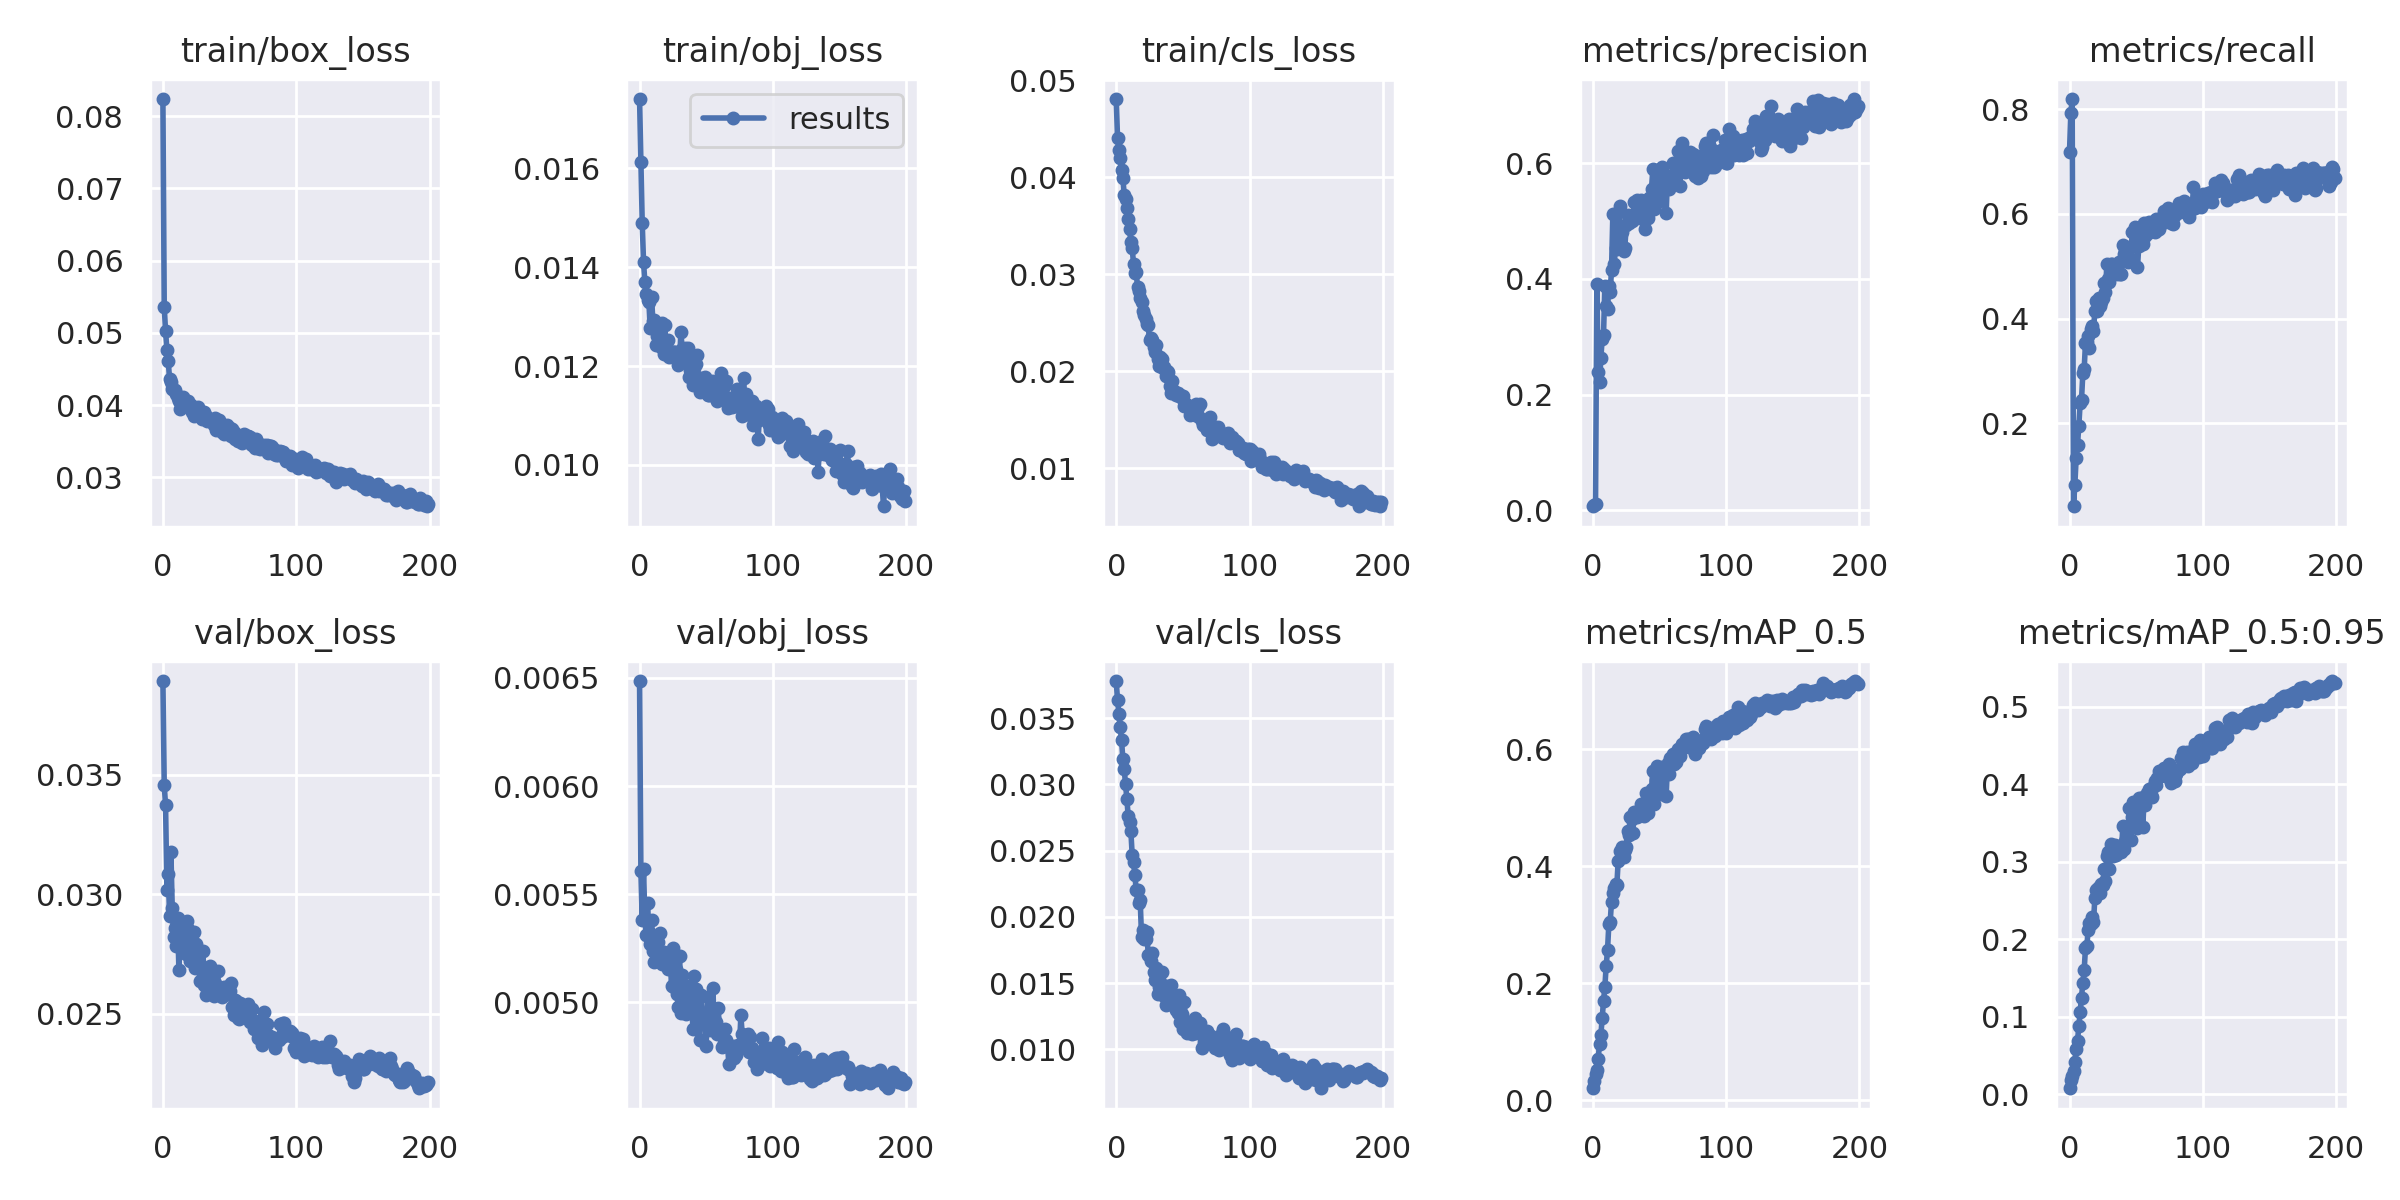

In [28]:
Image(filename='runs/train/exp/results.png', width=1280)

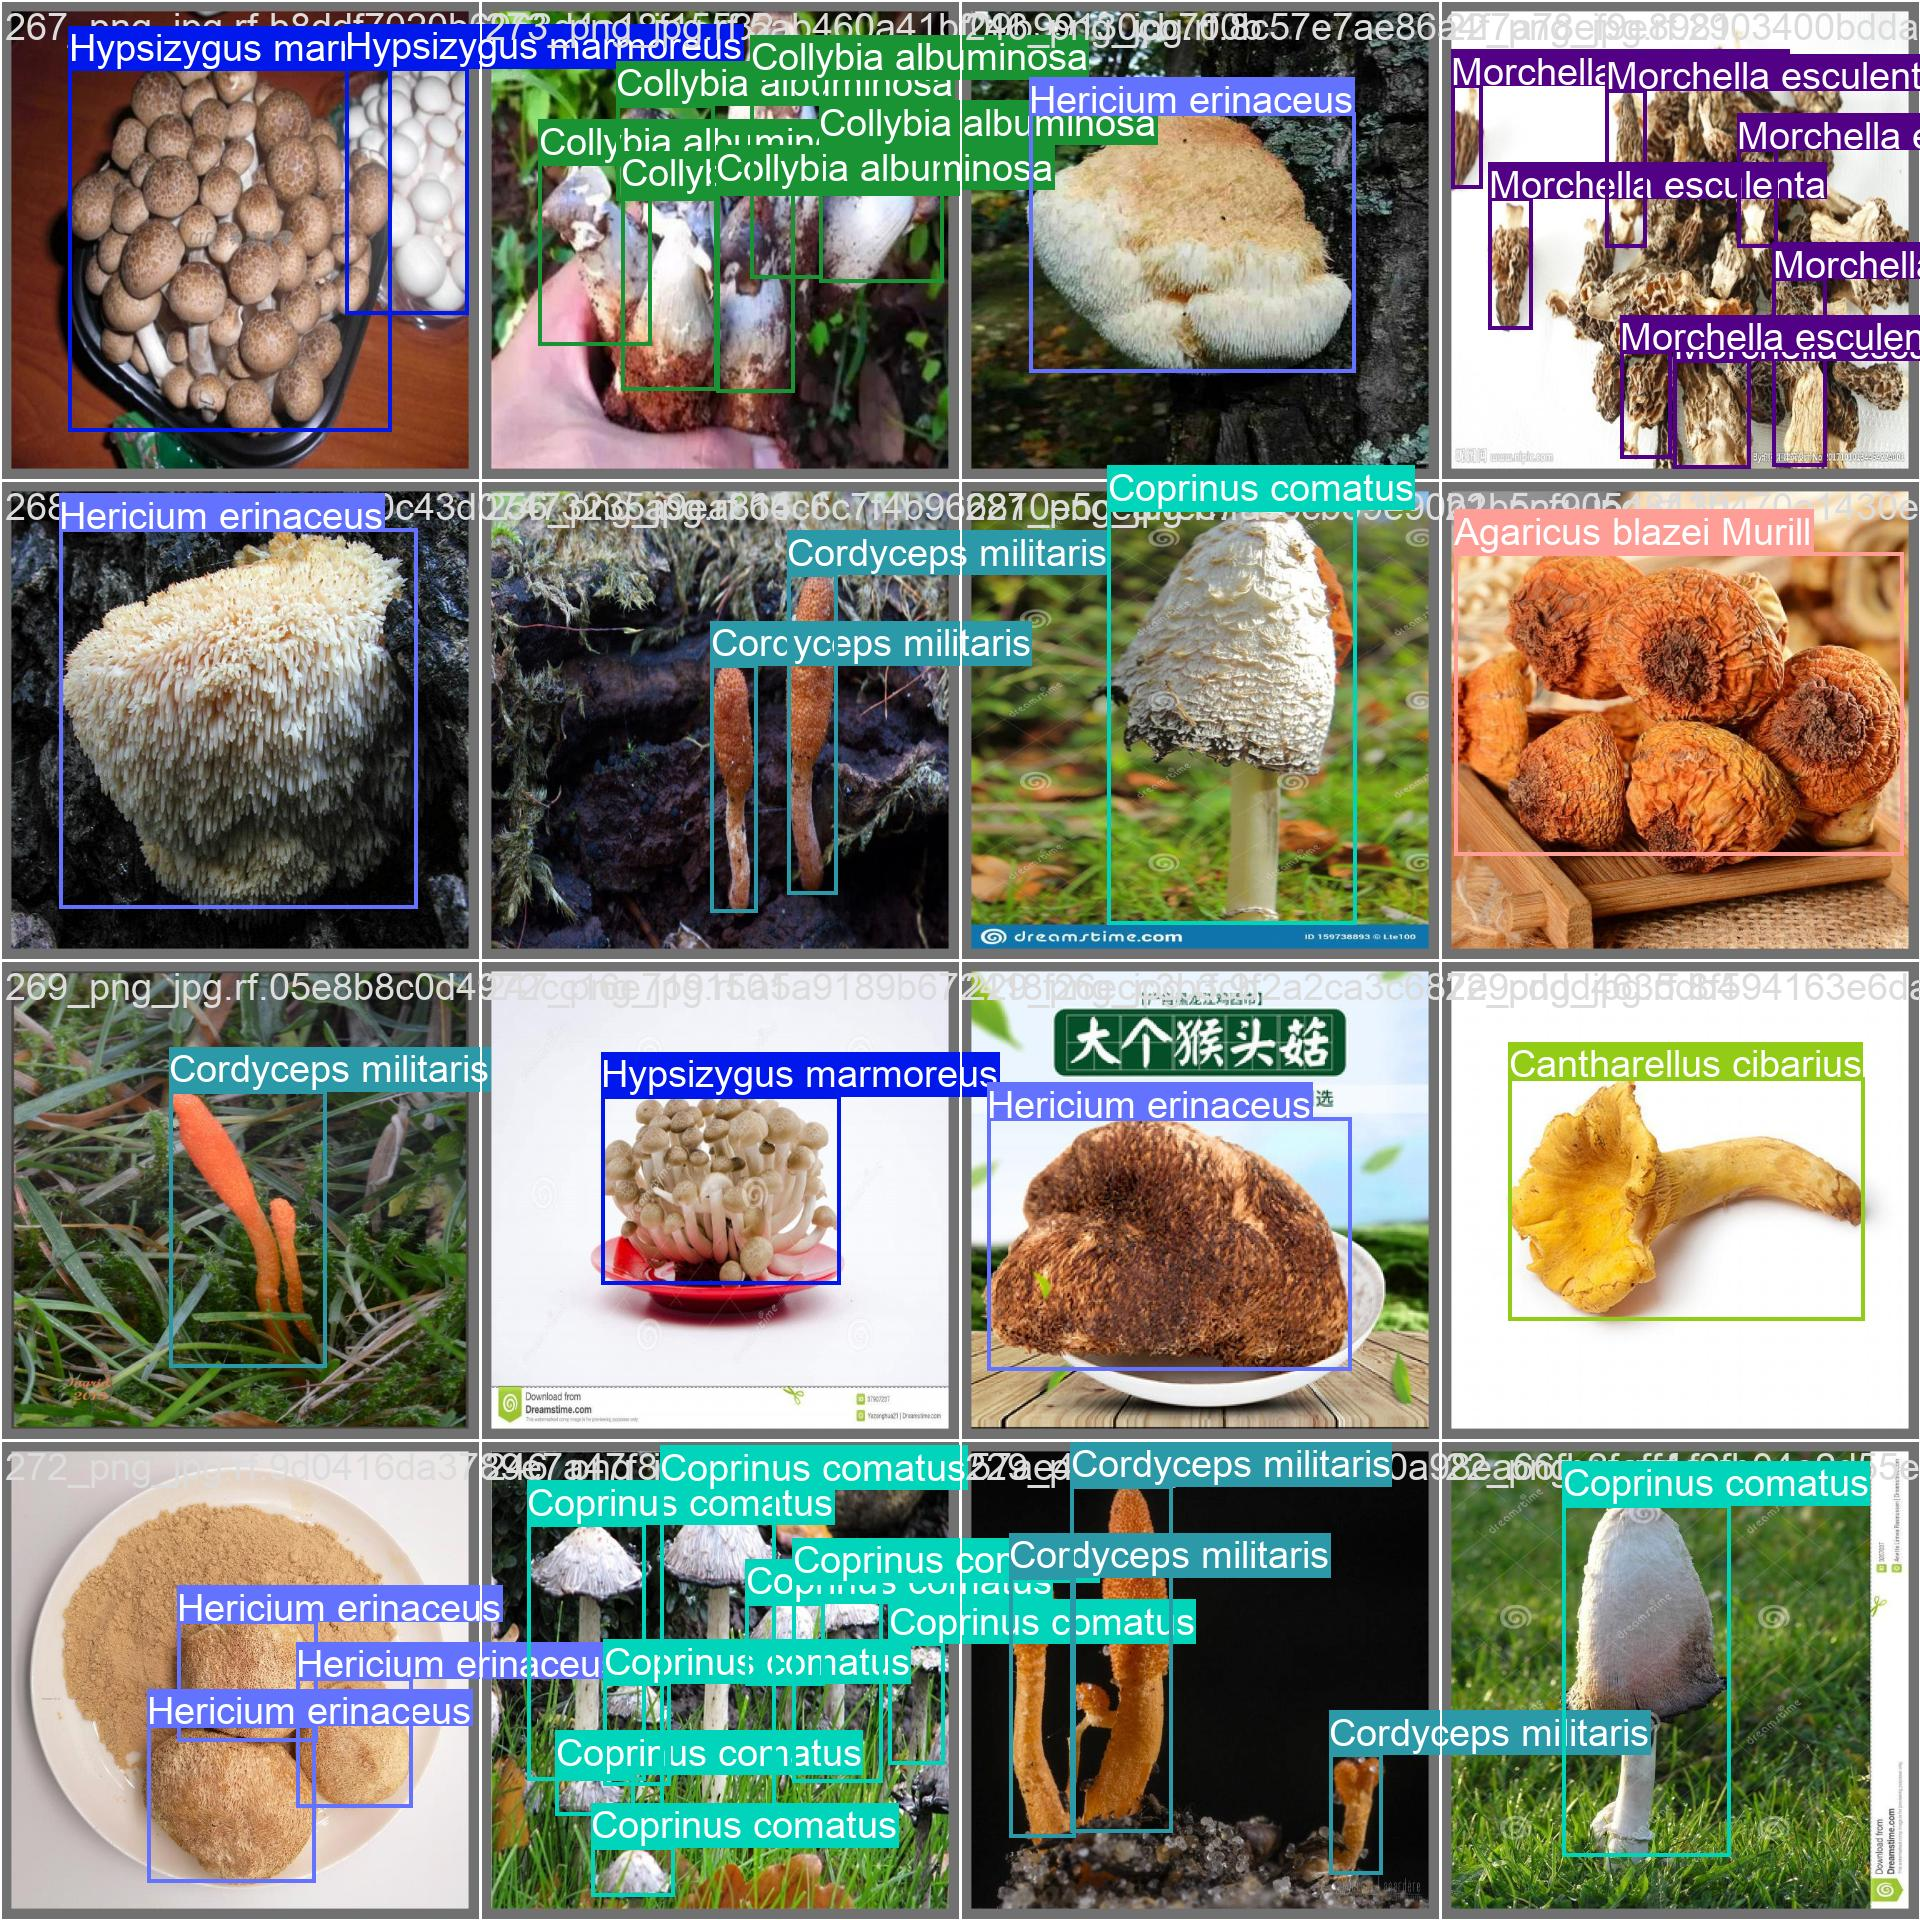

In [8]:
Image(filename='runs/train/exp/val_batch1_labels.jpg', width=800)

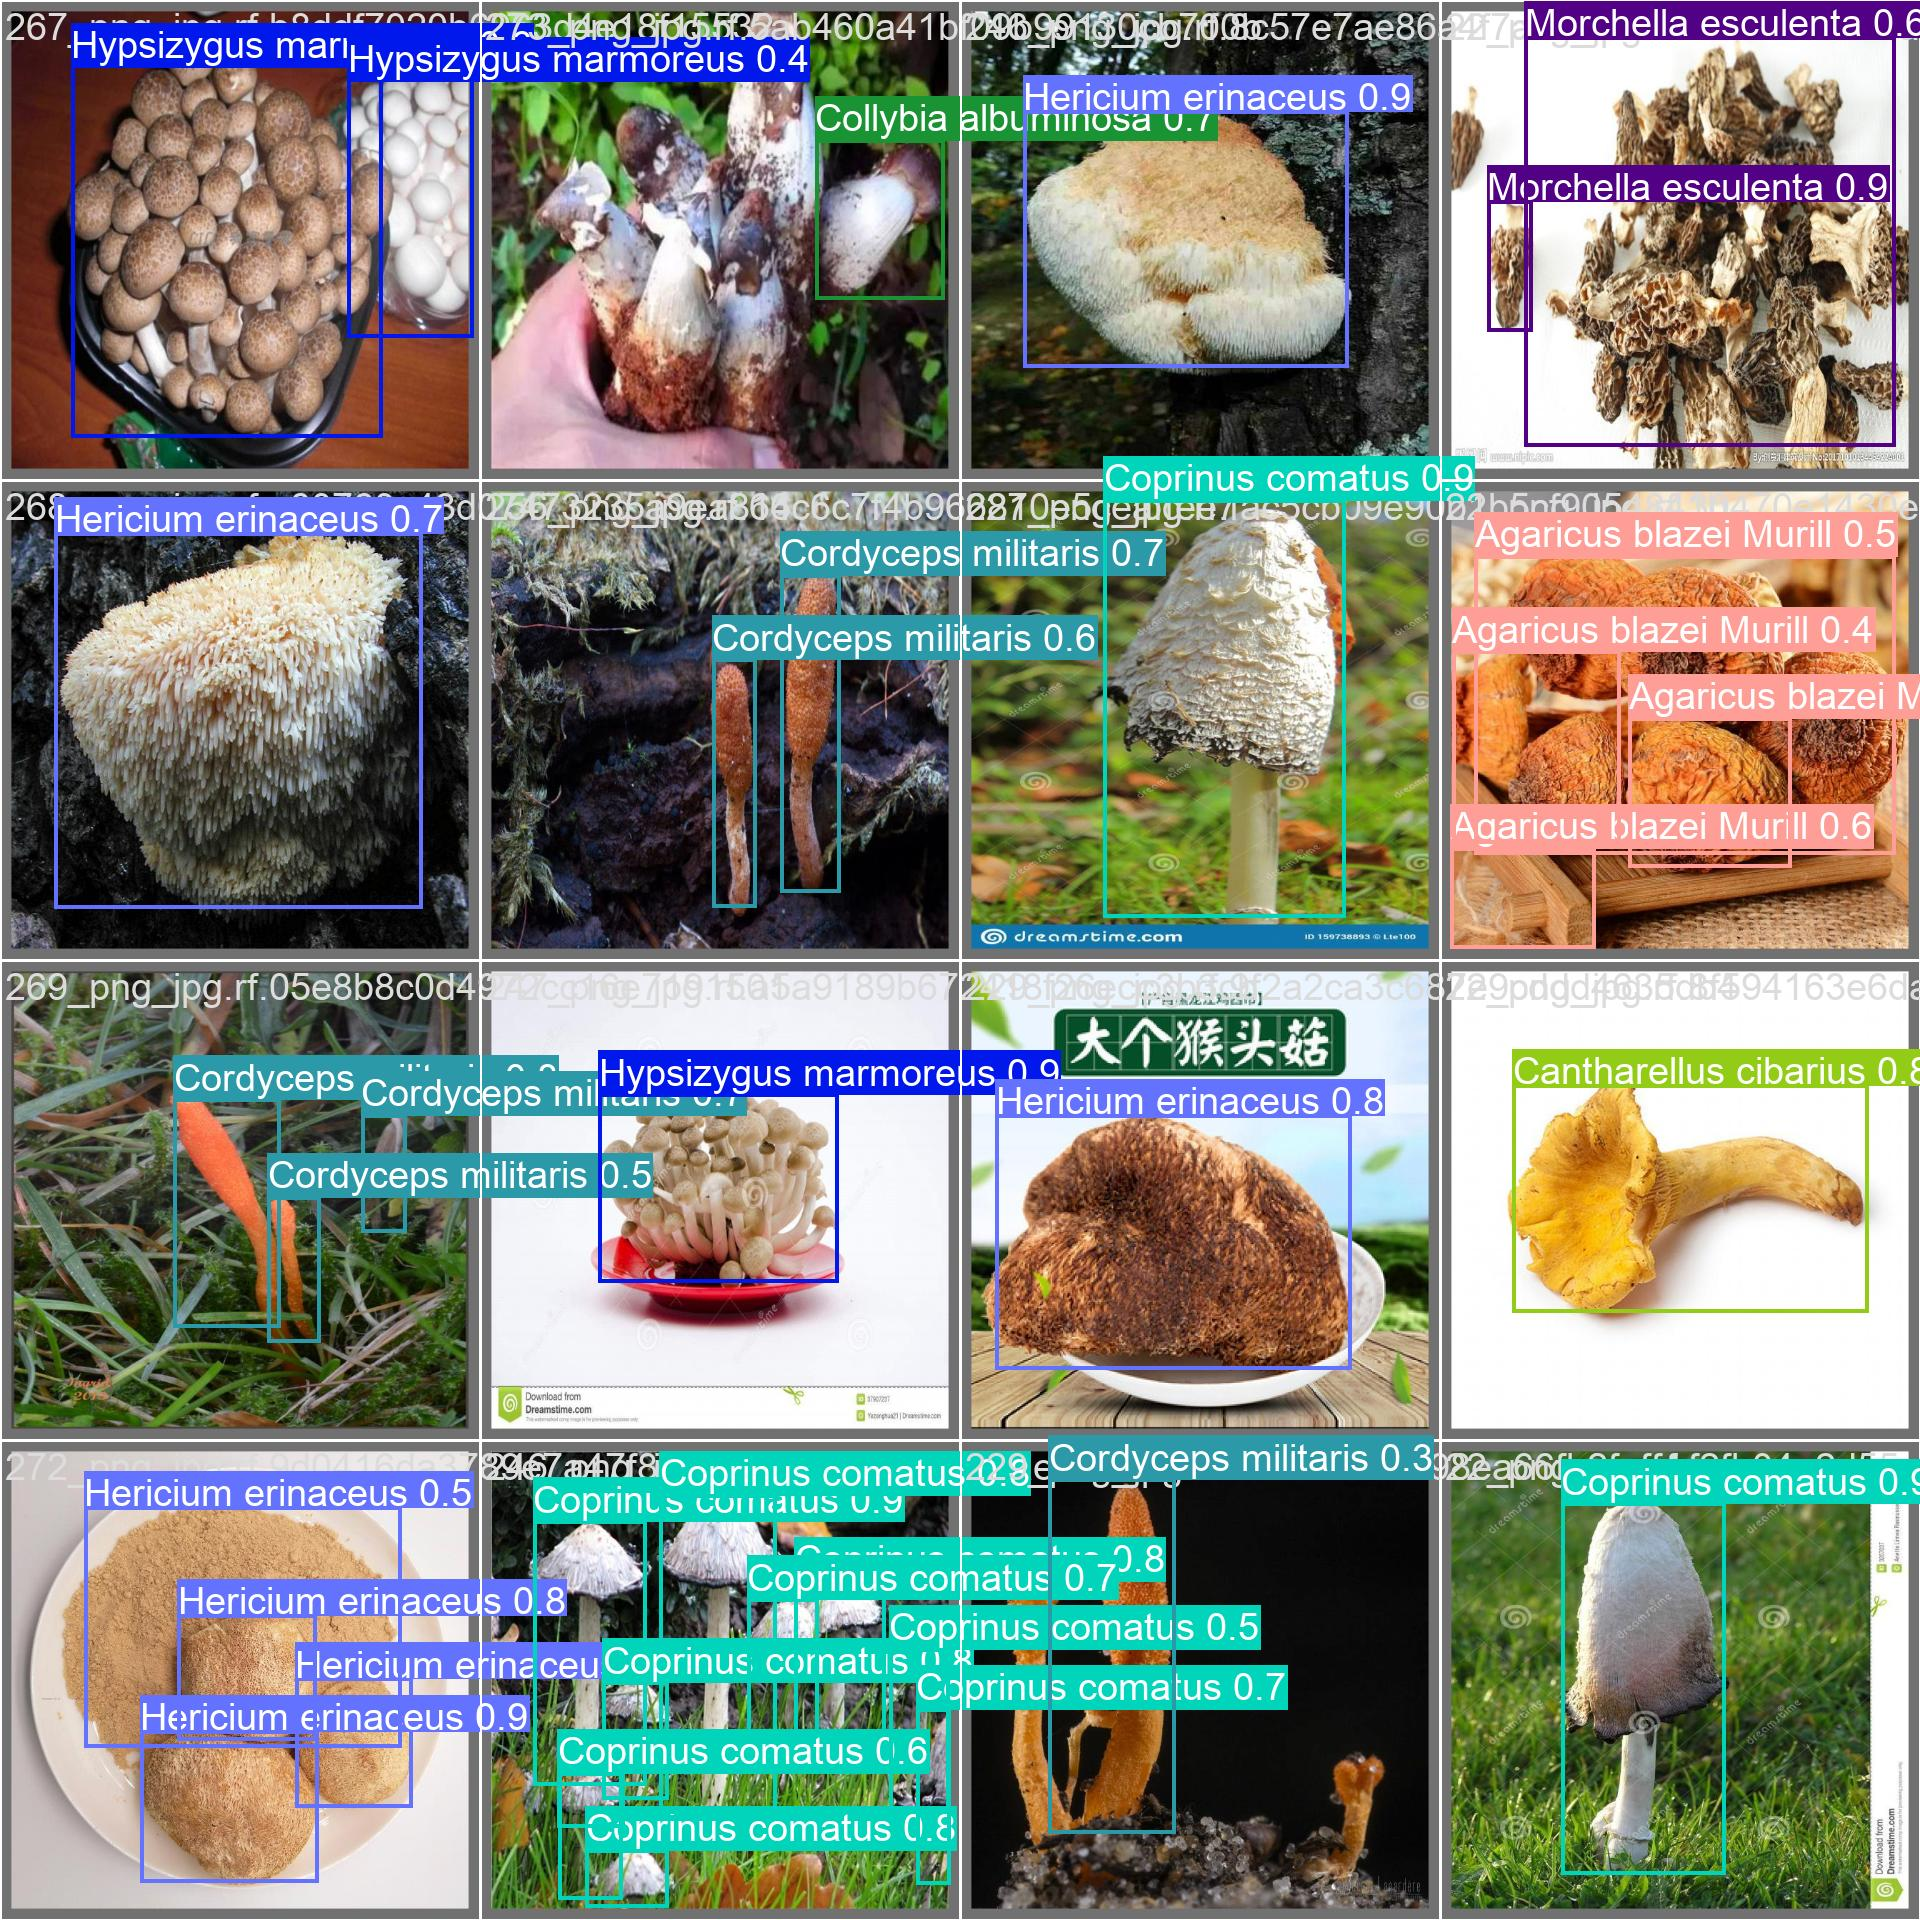

In [9]:
Image(filename='runs/train/exp/val_batch1_pred.jpg', width=800)

In [26]:
!python val.py --weights runs/train/exp/weights/best.pt --data Codev-3/data.yaml --task test

val: data=Codev-3/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-178-ga199480 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (Tesla V100-SXM2-32GB, 32511MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
test: Scanning /usr/src/app/p.krylov/yolov5/test/labels... 827 images, 0 backgro
test: New cache created: /usr/src/app/p.krylov/yolov5/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   
                   all        827       1838      0.721      0.698      0.736      0.538
     Agaricus bisporus        827         79      0.607      0.781       0.69      0.526
Agaricus blazei Murill        827   